# Importing Required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Importing data

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3089,5680-LQOGP,Female,0,No,No,68,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),82.45,5646.6,No
6858,2685-SREOM,Female,0,Yes,Yes,25,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,89.10,2368.4,Yes
110,0486-HECZI,Male,0,Yes,No,55,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,96.75,5238.9,Yes
2962,3237-AJGEH,Female,0,Yes,Yes,3,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,31.00,95.05,Yes
3398,3096-WPXBT,Female,0,Yes,Yes,61,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,Yes,One year,Yes,Credit card (automatic),100.70,6018.65,No


# Data exploration and Cleaning

dropping customer id

In [3]:
df.drop('customerID',inplace=True,axis=1)

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

converting the datatype of TotalCharges column to numeric
errors='coerce' will ignore the records that are not convertible and perform the action on the remaining records

In [6]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

checking the no. of null records in TotalCharges column 

In [7]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df.shape

(7043, 20)

dropping the null records

In [9]:
df=df[df.TotalCharges!=' ']

In [10]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.shape

(7032, 20)

In [12]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Actually converting the TotalCharges to numeric

In [13]:
df.TotalCharges=pd.to_numeric(df.TotalCharges)

In [14]:
df.TotalCharges.dtypes

dtype('float64')

Visualizing the churn ratio based on tenure

In [15]:
tenure_churn_no=df[df.Churn=='No'].tenure
tenure_churn_yes=df[df.Churn=='Yes'].tenure

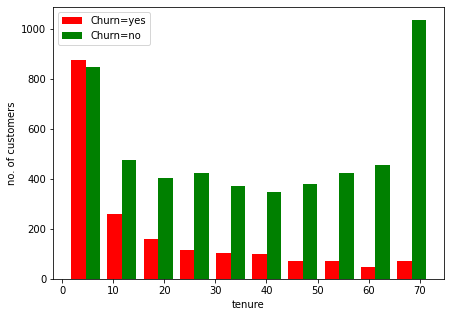

In [16]:
plt.figure(figsize=(7,5))
plt.xlabel('tenure')
plt.ylabel('no. of customers')
plt.hist([tenure_churn_yes,tenure_churn_no],label=['Churn=yes','Churn=no'],color=['red','green'])
plt.legend()
plt.show()

Visualizing the churn ratio based on Monthly charges

In [17]:
monthlyCharges_churn_no=df[df.Churn=='No'].MonthlyCharges
monthlyCharges_churn_yes=df[df.Churn=='Yes'].MonthlyCharges

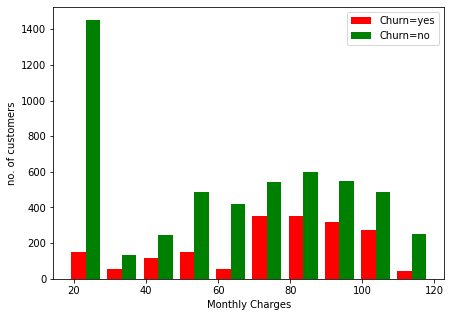

In [18]:
plt.figure(figsize=(7,5))
plt.xlabel('Monthly Charges')
plt.ylabel('no. of customers')
plt.hist([monthlyCharges_churn_yes,monthlyCharges_churn_no],label=['Churn=yes','Churn=no'],color=['red','green'])
plt.legend()
plt.show()

# Data Cleaning

In [19]:
def unique_column_values(dataset):    
    for i in dataset:
        if df[i].dtype=='object':
            print(i,':',df[i].unique())

In [20]:
unique_column_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [21]:
#replacing no service values to no
df.replace('No phone service','No',inplace=True)
df.replace('No internet service','No',inplace=True)

In [22]:
unique_column_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [23]:
#replacing yes and no with 1 and 0
df.replace('Yes',1,inplace=True)
df.replace('No',0,inplace=True)

In [24]:
for i in df:
    print(f'{i}:{df[i].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 0]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [25]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [26]:
#converting gender values to 0 and 1
df.gender.replace({'Female':1,'Male':0},inplace=True)

In [27]:
df.gender.unique()

array([1, 0], dtype=int64)

Performing OneHotEncoding on the categorical columns

In [28]:
cat_cols=['InternetService','Contract','PaymentMethod']

In [29]:
df=pd.get_dummies(df,cat_cols,drop_first=True)

In [30]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,1,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,0,0,0,1,0


# Scaling the data 

MinMaxScaler converts the data in the range of 0 to 1

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
col_to_scale=['tenure','MonthlyCharges','TotalCharges']
scaler=MinMaxScaler()
df[col_to_scale]=scaler.fit_transform(df[col_to_scale])

Splitting the data into train and test

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x=df.drop('Churn',axis=1)
y=df['Churn']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=.75,random_state=1)

In [35]:
xtrain.shape

(5274, 23)

In [36]:
xtest.shape

(1758, 23)

# Model building

In [37]:
from tensorflow import keras

In [38]:
model=keras.Sequential([
    keras.layers.Dense(23,input_shape=(23,),activation='relu'),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [39]:
model.fit(xtrain,ytrain,epochs=50)

Epoch 1/50
165/165 [==============================] - 5s 5ms/step - loss: 0.5504 - accuracy: 0.7078
Epoch 2/50
165/165 [==============================] - 1s 4ms/step - loss: 0.4425 - accuracy: 0.7941
Epoch 3/50
165/165 [==============================] - 1s 4ms/step - loss: 0.4289 - accuracy: 0.7973
Epoch 4/50
165/165 [==============================] - 1s 3ms/step - loss: 0.4240 - accuracy: 0.8003
Epoch 5/50
165/165 [==============================] - 1s 3ms/step - loss: 0.4213 - accuracy: 0.8028
Epoch 6/50
165/165 [==============================] - 1s 3ms/step - loss: 0.4182 - accuracy: 0.8077
Epoch 7/50
165/165 [==============================] - 0s 3ms/step - loss: 0.4159 - accuracy: 0.8070
Epoch 8/50
165/165 [==============================] - 1s 3ms/step - loss: 0.4148 - accuracy: 0.8075
Epoch 9/50
165/165 [==============================] - 1s 3ms/step - loss: 0.4130 - accuracy: 0.8081
Epoch 10/50
165/165 [==============================] - 1s 3ms/step - loss: 0.4112 - accuracy: 0.8089

In [40]:
model.evaluate(xtest,ytest)

55/55 [==============================] - 1s 3ms/step - loss: 0.4333 - accuracy: 0.7793


[0.43331190943717957, 0.7792946696281433]

In [41]:
yp=model.predict(xtest)

In [42]:
yp[:5]

array([[0.00527149],
       [0.71945024],
       [0.09587464],
       [0.69308287],
       [0.48143363]], dtype=float32)

In [43]:
ytest[:5]

1778    0
5036    1
1106    0
1665    0
927     1
Name: Churn, dtype: int64

Converting the predicted data into 0 and 1 as Sigmoid activation function returns values in the range of 0 to 1

In [44]:
y_predicted=[]
for i in yp:
    if i>0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0)

In [45]:
y_predicted[:5]

[0, 1, 0, 1, 0]

Generating classification report of our model

In [46]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(ytest,y_predicted))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1294
           1       0.59      0.54      0.56       464

    accuracy                           0.78      1758
   macro avg       0.71      0.70      0.71      1758
weighted avg       0.77      0.78      0.78      1758



Generating confution matrix and visualizing it using seaborn library

In [47]:
cm=confusion_matrix(ytest,y_predicted)

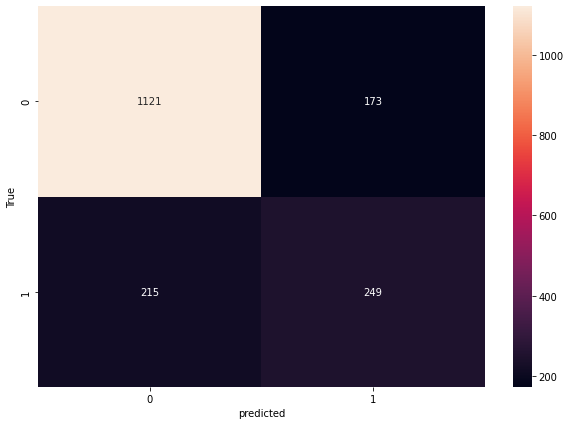

In [48]:
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('True')
plt.show()